# Inferring species trees with *tetrad*

When you install _ipyrad_ a number of analysis tools are installed as well. This includes the program __tetrad__, which applies the theory of phylogenetic invariants (see Lake 1987) to infer quartet trees based on a SNP alignment. It then uses the software wQMC to join the quartets into a species tree. This combined approach was first developed by Chifman and Kubatko (2015) in the software *SVDQuartets*. 

## CLI Reference
The command-line interface (CLI) to tetrad should be familiar to ipyrad users since it was designed to be very similar. In the CLI examples below the code should be executed in a terminal. *tetrad* takes a phylip formatted sequence file as input. It is recommended that use only the SNPs, which are contained in the ipyrad output file ending in `.snps.phy`. A futher assumption of this method is that the SNPs are unlinked. If you pass in the file ending in `.snps.map` then *tetrad* will use this to sample only one SNP per locus when analyzing each quartet sample in the analysis. This is the best way to maximize RAD-seq information in a species tree analysis. 

In [1]:
%%bash
## print the help screen
tetrad -h

usage: tetrad [-h] [-v] [-f] [-s seq] [-j json] [-m method] [-q nquartets]
              [-b boots] [-l map_file] [-r resolve] [-n name] [-o outdir]
              [-t starting_tree] [-c CPUs/cores] [-x random_seed] [-d] [--MPI]
              [--ipcluster]

optional arguments:
  -h, --help        show this help message and exit
  -v, --version     show program's version number and exit
  -f, --force       force overwrite of existing data
  -s seq            path to input phylip file (SNPs of full sequence file)
  -j json           load checkpointed/saved analysis from JSON file.
  -m method         method for sampling quartets (all, random, or equal)
  -q nquartets      number of quartets to sample (if not -m all)
  -b boots          number of non-parametric bootstrap replicates
  -l map_file       map file of snp linkages (e.g., ipyrad .snps.map)
  -r resolve        randomly resolve heterozygous sites (default=1)
  -n name           output name prefix (default: 'test')
  -o outdir     

### Infer a tree

In this example we are using the map file to partition the data set to sample unlinked SNPs. We set a name for the assembly (pedictest) and an output directory (testdir), both of which are optional. The default method is to sample all quartets, alternatively, you can set it to randomly sample some number of quartets. To start, let's also tell it to do 10 bootstrap replicates. 

In [2]:
%%bash

## Let's run the Pedicularis example data set through tetrad
tetrad -s pedicularis/pedic_outfiles/pedic.snps.phy \
       -l pedicularis/pedic_outfiles/pedic.snps.map \
       -n pedictest -o testdir -c 4 -b 10


 ----------------------------------------------------------------------
  tetrad [v.0.5.0]
  Quartet inference from phylogenetic invariants
  Distributed as part of the ipyrad.analysis toolkit
 ----------------------------------------------------------------------  
  loading seq array [13 taxa x 173439 bp]
  max unlinked SNPs per quartet: 37581
  new Tetrad instance: pedictest
  local compute node: [4 cores] on tinus

  inferring 715 induced quartet trees
  [####################] 100%  initial tree | 0:00:18 |  
  running 10 bootstrap replicates
  [####################] 100%  boot 1       | 0:00:08 |  
  [####################] 100%  boot 2       | 0:00:10 |  
  [####################] 100%  boot 3       | 0:00:08 |  
  [####################] 100%  boot 4       | 0:00:09 |  
  [####################] 100%  boot 5       | 0:00:08 |  
  [####################] 100%  boot 6       | 0:00:08 |  
  [####################] 100%  boot 7       | 0:00:08 |  
  [####################] 100%  boot 8   

### Run more bootstrap replicates
Bootstrap resampling samples loci with replacement to the same number of loci as in the original data set. You can turn on bootstrapping by using the -b flag. In addition, you can continue a previous run by loading the JSON file with the -j flag, and setting a larger number of bootstrap reps to run. The json file is saved in the output directory that was designated. 

In [3]:
%%bash
tetrad -j testdir/pedictest.tet.json -b 20 -c 4


 ----------------------------------------------------------------------
  tetrad [v.0.5.0]
  Quartet inference from phylogenetic invariants
  Distributed as part of the ipyrad.analysis toolkit
 ----------------------------------------------------------------------  
  Continuing checkpointed analysis: pedictest
    sampling method: all
    bootstrap checkpoint: 9
    array checkpoint: 0

  local compute node: [4 cores] on tinus

  running 20 bootstrap replicates
  [####################] 100%  boot 10      | 0:00:18  
  [####################] 100%  boot 11      | 0:00:08  
  [####################] 100%  boot 12      | 0:00:07  
  [####################] 100%  boot 13      | 0:00:08  
  [####################] 100%  boot 14      | 0:00:08  
  [####################] 100%  boot 15      | 0:00:09  
  [####################] 100%  boot 16      | 0:00:09  
  [####################] 100%  boot 17      | 0:00:08  
  [####################] 100%  boot 18      | 0:00:08  
  [####################] 100

### API Reference

A more fun way to run *tetrad* is using the *ipyrad* API. Here you can access the underlying Class objects in Python. As you'll see below, this can be particularly nice because *ipyrad* has some additional tools for downstream analysis of the *tetrad* results. For example, *tetrad* saves information that can be used to calculate ABBA-BABA test results. 

If you are running the API then you must have an ipcluster instance started in order to parallelize your code. This can be started locally by opening a separate terminal and running (`ipcluster start -n=10`) to start 10 engines. Or, to run your code on a remote cluster set up your ipcluster instance following [this tutorial](http://ipyrad.readthedocs.io/HPC_Tunnel.html).

In [1]:
from ipyrad.analysis.tetrad import Tetrad

In [4]:
## Create a Quartet Class object and enter default params
data = Tetrad(name="api2",
              wdir="testdir",
              mapfile="pedicularis/pedic_outfiles/pedic.snps.map",
              seqfile="pedicularis/pedic_outfiles/pedic.snps.phy")

  loading seq array [13 taxa x 173439 bp]
  max unlinked SNPs per quartet: 37581


In [5]:
## Infer the best tree
data.run()

  local compute node: [4 cores] on tinus

  inferring 715 induced quartet trees
  [####################] 100%  initial tree | 0:00:20 |  

  Statistics for sampling, discordance, and tree support:
    > /home/deren/Documents/ipyrad/tests/testdir/api2.stats.txt
    
  Best tree inferred from the full SNP array:
    > /home/deren/Documents/ipyrad/tests/testdir/api2.full.tre
    

               /-38362_rex
            /-|
           |   \-39618_rex
         /-|
        |  |   /-35855_rex
        |   \-|
      /-|      \-40578_rex
     |  |
     |  |   /-30556_thamno
   /-|   \-|
  |  |      \-35236_rex
  |  |
  |   \-33413_thamno
  |
  |      /-29154_superba
  |   /-|
--|  |   \-30686_cyathophylla
  |--|
  |  |   /-41478_cyathophylloides
  |   \-|
  |      \-41954_cyathophylloides
  |
  |   /-32082_przewalskii
   \-|
      \-33588_przewalskii

  * For tips on plotting trees in R: ipyrad.readthedocs.org/cookbook.html     
  * For tips on citing this software: ipyrad.readthedocs.org/tetrad

In [6]:
## run additional bootstrap replicates
data.nboots = 10
data.run()

  local compute node: [4 cores] on tinus

  running 10 bootstrap replicates
  [####################] 100%  boot 1       | 0:00:08 |  
  [####################] 100%  boot 2       | 0:00:09 |  
  [####################] 100%  boot 3       | 0:00:08 |  
  [####################] 100%  boot 4       | 0:00:09 |  
  [####################] 100%  boot 5       | 0:00:09 |  
  [####################] 100%  boot 6       | 0:00:07 |  
  [####################] 100%  boot 7       | 0:00:08 |  
  [####################] 100%  boot 8       | 0:00:08 |  
  [####################] 100%  boot 9       | 0:00:08 |  

  Statistics for sampling, discordance, and tree support:
    > /home/deren/Documents/ipyrad/tests/testdir/api2.stats.txt
    
  Best tree inferred from the full SNP array:
    > /home/deren/Documents/ipyrad/tests/testdir/api2.full.tre
    
  Extended majority-rule consensus over bootstraps w/ support as edge lengths:
    > /home/deren/Documents/ipyrad/tests/testdir/api2.consensus.tre

  All bootst

### Alternatively, sample a subset of quartets

In [2]:
## Create a Quartet Class object and enter params
sub = Tetrad(name="api",
             wdir="testdir",
             method="random", 
             nquartets=400, 
             nboots=10,
             mapfile="pedicularis/pedic_outfiles/pedic.snps.map",
             seqfile="pedicularis/pedic_outfiles/pedic.snps.phy")

## run inference
sub.run()

  loading seq array [13 taxa x 173439 bp]
  max unlinked SNPs per quartet: 37581
  local compute node: [4 cores] on tinus

  inferring 715 induced quartet trees
  [####################] 100%  initial tree | 0:00:09 |  
  running 10 bootstrap replicates
  [####################] 100%  boot 1       | 0:00:09 |  
  [####################] 100%  boot 2       | 0:00:09 |  
  [####################] 100%  boot 3       | 0:00:08 |  
  [####################] 100%  boot 4       | 0:00:08 |  
  [####################] 100%  boot 5       | 0:00:08 |  
  [####################] 100%  boot 6       | 0:00:08 |  
  [####################] 100%  boot 7       | 0:00:09 |  
  [####################] 100%  boot 8       | 0:00:08 |  
  [####################] 100%  boot 9       | 0:00:09 |  

  Statistics for sampling, discordance, and tree support:
    > /home/deren/Documents/ipyrad/tests/testdir/api.stats.txt
    
  Best tree inferred from the full SNP array:
    > /home/deren/Documents/ipyrad/tests/testdir/api

### What does *tetrad* do differently from *svdquartets*?

Not too much currently. But we have plans to expand it. Importantly, however, the code is open source meaning that anybody can read it and contribute it, which is not the case for Paup\*. *tetrad* is also easier to install usign conda and therefore easier to setup on an HPC cluster or local machine. 

### Plot the resulting tree in R
The trees are unrooted and support values are on the edges. This can be a bit confusing, but is in fact a recommended way to store support values as it is more secure from being confused when trees are re-rooted. 

In [3]:
## this command allows us to run R code in a Jupyter notebook.
%load_ext rpy2.ipython

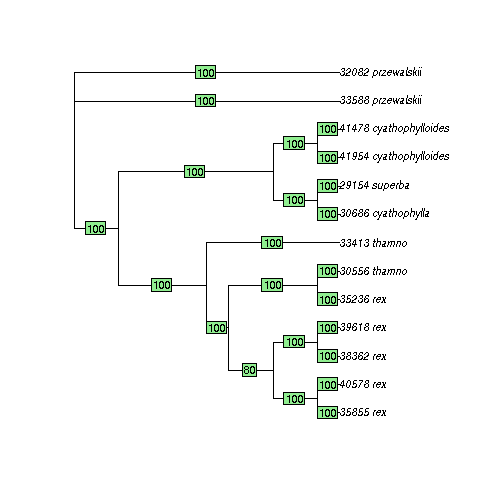

In [6]:
%%R -w 500 -h 500

## load ape
library(ape)

## read in the tree, root it, and ladderize
tre <- read.tree("~/Documents/ipyrad/tests/testdir/api.consensus.tre")
rtre <- root(tre, c("33588_przewalskii", "32082_przewalskii"))
ltre <- ladderize(rtre)

## plot the tre
plot(ltre, use.edge.length=FALSE)
edgelabels(ltre$edge.length)